Biaya Optimal: 0


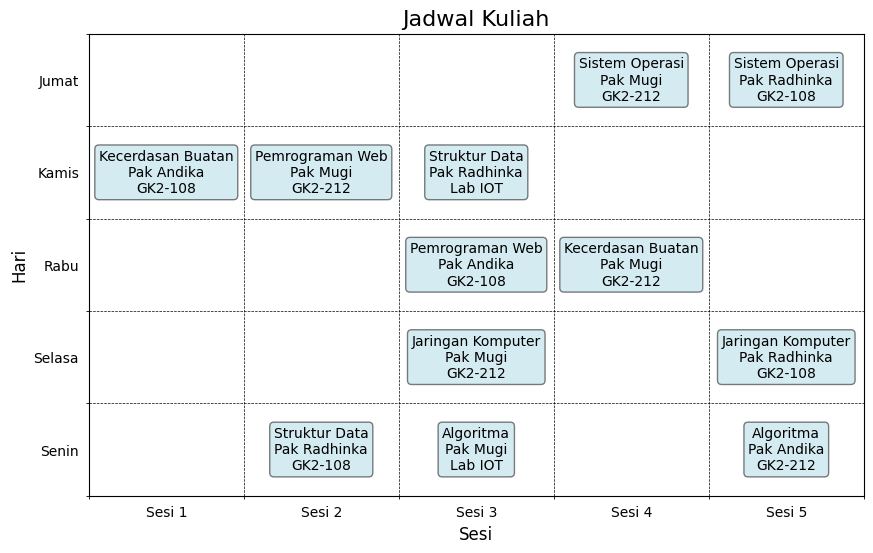

In [34]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Updated problem parameters based on your input
courses = ["Algoritma", "Sistem Operasi", "Struktur Data", "Jaringan Komputer", "Kecerdasan Buatan", "Pemrograman Web"]
professors = ["Pak Andika", "Pak Radhinka", "Pak Mugi"]  # 3 fixed professors
rooms = ["Lab IOT", "GK2-212", "GK2-108"]  # Updated room names
days = ["Senin", "Selasa", "Rabu", "Kamis", "Jumat"]  # Updated days
sessions_per_day = 5  # Maximum 5 sessions per day
course_sessions = {course: 2 for course in courses}  # Each course needs 2 sessions per week

# Generate a random initial schedule
def generate_initial_schedule():
    schedule = [[None for _ in range(sessions_per_day)] for _ in range(len(days))]
    for course, sessions in course_sessions.items():
        for _ in range(sessions):
            while True:
                day = random.randint(0, len(days) - 1)
                session = random.randint(0, sessions_per_day - 1)
                if schedule[day][session] is None:  # Ensure the slot is empty
                    professor = random.choice(professors)
                    room = random.choice(rooms)
                    schedule[day][session] = (course, professor, room)
                    break
    return schedule

# Cost function to evaluate the schedule for conflicts
def calculate_cost(schedule):
    cost = 0
    for day in schedule:
        room_usage = {}
        professor_usage = {}
        for session in day:
            if session:
                course, professor, room = session
                # Penalize room conflicts
                if room in room_usage:
                    cost += 1
                room_usage[room] = True
                # Penalize professor conflicts
                if professor in professor_usage:
                    cost += 1
                professor_usage[professor] = True
    return cost

# Generate neighbors by swapping two random slots
def generate_neighbors(schedule):
    neighbors = []
    for _ in range(10):  # Generate 10 neighbors
        new_schedule = [day[:] for day in schedule]
        day1, day2 = random.sample(range(len(days)), 2)
        session1, session2 = random.randint(0, sessions_per_day - 1), random.randint(0, sessions_per_day - 1)
        new_schedule[day1][session1], new_schedule[day2][session2] = (
            new_schedule[day2][session2],
            new_schedule[day1][session1],
        )
        neighbors.append(new_schedule)
    return neighbors

# Hill Climbing Algorithm
def hill_climbing():
    current_schedule = generate_initial_schedule()
    current_cost = calculate_cost(current_schedule)
    while True:
        neighbors = generate_neighbors(current_schedule)
        next_schedule = None
        next_cost = float("inf")
        for neighbor in neighbors:
            cost = calculate_cost(neighbor)
            if cost < next_cost:
                next_schedule = neighbor
                next_cost = cost
        if next_cost >= current_cost:  # No improvement
            break
        current_schedule, current_cost = next_schedule, next_cost
    return current_schedule, current_cost

# Visualization of the schedule
def visualize_schedule(schedule):
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_title("Jadwal Kuliah", fontsize=16)
    ax.set_xlabel("Sesi", fontsize=12)
    ax.set_ylabel("Hari", fontsize=12)
    ax.set_xticks(range(sessions_per_day))
    ax.set_yticks(range(len(days)))
    ax.set_xticklabels([f"Sesi {i+1}" for i in range(sessions_per_day)])
    ax.set_yticklabels(days)
    ax.set_xlim(-0.5, sessions_per_day - 0.5)
    ax.set_ylim(-0.5, len(days) - 0.5)

    for day_idx, day in enumerate(schedule):
        for session_idx, session in enumerate(day):
            if session:
                course, professor, room = session
                text = f"{course}\n{professor}\n{room}"
                ax.text(session_idx, day_idx, text, ha="center", va="center", fontsize=10, bbox=dict(boxstyle="round", facecolor="lightblue", alpha=0.5))

    # Grid lines for better clarity
    ax.set_xticks(np.arange(-0.5, sessions_per_day, 1), minor=True)
    ax.set_yticks(np.arange(-0.5, len(days), 1), minor=True)
    ax.grid(which="minor", color="black", linestyle="--", linewidth=0.5)
    ax.tick_params(left=False, bottom=False, labelleft=True, labelbottom=True)
    plt.show()

# Run the algorithm and visualize the results
optimal_schedule, optimal_cost = hill_climbing()
print(f"Biaya Optimal: {optimal_cost}")
visualize_schedule(optimal_schedule)
